 # Currently cuts data from entire row if one column is outside of range, maybe change that 

In [3]:
import numpy as np
import h5py as h5
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [4]:
keys_used = ['dfeitg_gb_div_efiitg_gb', 'dfetem_gb_div_efetem_gb',
       'dfiitg_gb_div_efiitg_gb', 'dfitem_gb_div_efetem_gb', 'efeetg_gb',
       'efeitg_gb_div_efiitg_gb', 'efetem_gb', 'efiitg_gb',
       'efitem_gb_div_efetem_gb', 'pfeitg_gb_div_efiitg_gb',
       'pfetem_gb_div_efetem_gb', 'pfiitg_gb_div_efiitg_gb',
       'pfitem_gb_div_efetem_gb', 'vceitg_gb_div_efiitg_gb',
       'vcetem_gb_div_efetem_gb', 'vciitg_gb_div_efiitg_gb',
       'vcitem_gb_div_efetem_gb', 'vfiitg_gb_div_efiitg_gb',
       'vfitem_gb_div_efetem_gb', 'vteitg_gb_div_efiitg_gb','vtiitg_gb_div_efiitg_gb',]

In [5]:
path = '/lustre/home/pr5739/qualikiz/'


In [7]:
with h5.File(f'{path}my_experiments/qlknn/data/qlk_jetexp_nn_training_database_minimal.h5', "r") as f:
    inputs = f['input']['block0_values'][()]
    input_names = f['input']['block0_items'][()]
    index_inp = f['input']['axis1'][()]   #row number from 0 to len(inputs)

    outputs = f['output']['block0_values'][()]
    output_names = f['output']['block0_items'][()]
    index_out = f['output']['axis1'][()]   #row number from 0 to len(inputs) with some missing rows

good_idx = np.intersect1d(index_inp, index_out)
print(f'Percentage of good inputs: {100*(len(good_idx)/ len(index_inp))}')

Percentage of good inputs: 66.15013647273015


In [8]:
df_in = pd.DataFrame(inputs, index_inp, input_names)
df_in.rename(columns=lambda x: str(x.decode("utf-8")).lower() , inplace=True)

In [9]:
df_out = pd.DataFrame(outputs, index_out, output_names)
df_out.rename(columns=lambda x: str(x.decode("utf-8")).lower() , inplace=True)
df_out = df_out[keys_used]

In [10]:
idx_in = df_in.index.values.tolist()
idx_out = df_out.index.values.tolist()
intersect = np.intersect1d(idx_in, idx_out)

df_out.reindex(range(df_in.index[0], df_in.index[-1] + 1), fill_value = np.nan)

#Give a class label of 1 to inputs which have an output and 0 to inputs without a corresponding QuaLiKz output
y = np.where(np.in1d(index_inp, index_out), 1, 0)

df = pd.concat([df_in, df_out], axis = 1)

df['target'] = y

df.describe()

,ane,ate,autor,machtor,x,zeff,gammae,q,smag,alpha,...,pfitem_gb_div_efetem_gb,vceitg_gb_div_efiitg_gb,vcetem_gb_div_efetem_gb,vciitg_gb_div_efiitg_gb,vcitem_gb_div_efetem_gb,vfiitg_gb_div_efiitg_gb,vfitem_gb_div_efetem_gb,vteitg_gb_div_efiitg_gb,vtiitg_gb_div_efiitg_gb,target
count,3.339495e+07,3.339495e+07,3.339495e+07,3.339495e+07,3.339495e+07,3.339495e+07,3.339495e+07,3.339495e+07,3.339495e+07,3.339495e+07,...,2.051229e+06,5.896218e+06,2.049859e+06,5.897691e+06,2.047721e+06,5.897899e+06,2.047172e+06,5.894213e+06,5.895581e+06,3.339495e+07
mean,3.327907e+00,8.033314e+00,5.472350e-01,1.052038e-01,5.348065e-01,1.845140e+00,-7.702677e-02,2.213129e+00,1.030079e+00,3.246243e-01,...,3.104906e-01,1.638167e-02,-1.191629e-01,-2.165675e-01,-2.571370e-02,1.877226e-02,2.176177e-02,-2.627408e-02,-2.578252e-01,6.615014e-01
std,9.255258e+01,2.265903e+01,2.484773e+00,1.853974e-01,2.666783e-01,6.508561e-01,2.488165e+07,1.227521e+00,1.763052e+00,8.461066e-01,...,7.621881e-01,4.316051e-02,9.914239e-02,1.324188e-01,9.396385e-02,6.906960e-02,7.846725e-02,1.492491e-01,5.858952e-01,4.731990e-01
min,-2.104507e+04,-8.557695e+03,-1.849448e+02,-2.921602e-01,2.246824e-02,1.001057e+00,-4.299727e+09,6.446359e-01,-1.465966e+02,-2.225995e+01,...,-5.832784e+02,-1.997671e+00,-1.999825e+00,-1.999955e+00,-1.999906e+00,-1.499568e+00,-1.496556e+00,-4.999694e+00,-7.499960e+00,0.000000e+00
25%,2.840702e-01,2.424398e+00,0.000000e+00,0.000000e+00,3.246827e-01,1.335817e+00,0.000000e+00,1.330854e+00,1.227895e-01,5.956428e-02,...,2.224564e-01,5.252023e-03,-1.470981e-01,-2.788175e-01,-3.458075e-02,0.000000e+00,0.000000e+00,-2.506228e-02,-4.879341e-01,0.000000e+00
50%,1.728404e+00,5.435453e+00,0.000000e+00,0.000000e+00,5.461723e-01,1.746776e+00,0.000000e+00,1.890271e+00,5.490586e-01,1.425290e-01,...,2.834135e-01,1.412262e-02,-1.020628e-01,-1.912521e-01,-1.201715e-02,0.000000e+00,0.000000e+00,-9.912304e-03,-1.537186e-01,1.000000e+00
75%,3.844319e+00,9.600404e+00,8.006786e-01,1.645138e-01,7.568933e-01,2.175440e+00,0.000000e+00,2.742778e+00,1.420829e+00,3.791013e-01,...,3.675522e-01,2.530770e-02,-6.751383e-02,-1.290011e-01,7.401004e-03,0.000000e+00,0.000000e+00,-8.040043e-04,8.040851e-02,1.000000e+00
max,2.105537e+04,8.059684e+03,1.307951e+02,1.157954e+00,9.541317e-01,1.164230e+01,4.299727e+09,3.189302e+01,4.978162e+02,1.217655e+02,...,3.574863e+02,9.999922e-01,9.973652e-01,9.651765e-01,9.939446e-01,1.499983e+00,1.499919e+00,9.992913e-01,7.493668e+00,1.000000e+00


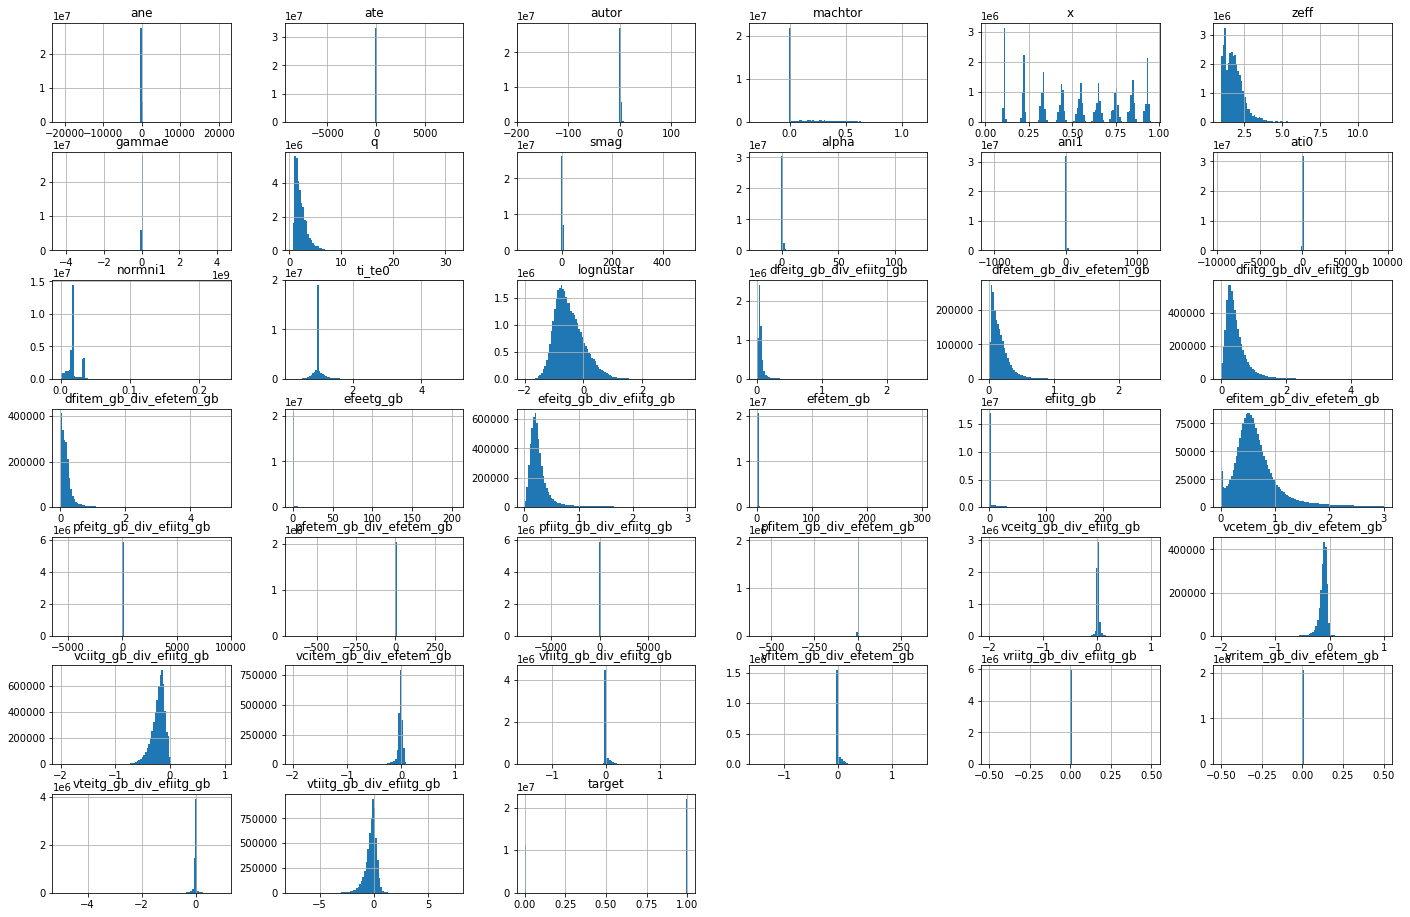

In [14]:
df.hist(figsize = (24,16), bins = 100);

In [33]:
df.vritem_gb_div_efetem_gb.unique()

array([nan,  0.])

## Some outlier no outputs also end up being dropped

In [ ]:
Q1 = df.quantile(0.01)
Q9 = df.quantile(0.99)

# Last value is categorial target which takes 0 or 1, no outliers here so make sure all values are accepted
Q1[-1] = -1
Q9[-1] = 2

df_cut = df[~((df < Q1) | (df > Q9)).any(axis = 1) ]

In [35]:
df_cut.describe()

,ane,ate,autor,machtor,x,zeff,gammae,q,smag,alpha,...,vcetem_gb_div_efetem_gb,vciitg_gb_div_efiitg_gb,vcitem_gb_div_efetem_gb,vfiitg_gb_div_efiitg_gb,vfitem_gb_div_efetem_gb,vriitg_gb_div_efiitg_gb,vritem_gb_div_efetem_gb,vteitg_gb_div_efiitg_gb,vtiitg_gb_div_efiitg_gb,target
count,2.606793e+07,2.606793e+07,2.606793e+07,2.606793e+07,2.606793e+07,2.606793e+07,2.606793e+07,2.606793e+07,2.606793e+07,2.606793e+07,...,1.254200e+06,4.521357e+06,1.254200e+06,4.521343e+06,1.254201e+06,4521357.0,1254205.0,4.521356e+06,4.521357e+06,2.606793e+07
mean,2.331190e+00,6.707727e+00,4.694467e-01,1.007069e-01,5.088773e-01,1.786737e+00,-2.451793e-03,2.017863e+00,8.577282e-01,2.391418e-01,...,-1.170438e-01,-2.249024e-01,-1.918087e-02,1.453338e-02,1.470949e-02,0.0,0.0,-1.560441e-02,-2.485196e-01,6.625898e-01
std,4.056659e+00,6.493343e+00,8.740768e-01,1.763652e-01,2.463431e-01,5.646687e-01,2.730822e-01,9.463186e-01,1.009953e+00,2.917431e-01,...,6.100867e-02,1.113598e-01,5.147030e-02,4.174498e-02,4.013029e-02,0.0,0.0,2.916358e-02,4.724196e-01,4.728262e-01
min,-9.786824e+00,-4.610797e+00,-2.728162e-01,0.000000e+00,1.056322e-01,1.021973e+00,-2.958060e+00,8.221742e-01,-3.476932e-01,1.803778e-03,...,-4.598599e-01,-6.286192e-01,-3.361656e-01,-7.052793e-02,-1.507114e-02,0.0,0.0,-4.215705e-01,-2.205717e+00,0.000000e+00
25%,2.984789e-01,2.562461e+00,0.000000e+00,0.000000e+00,3.231614e-01,1.298992e+00,0.000000e+00,1.296212e+00,1.290574e-01,5.596344e-02,...,-1.472179e-01,-2.863365e-01,-3.671207e-02,0.000000e+00,0.000000e+00,0.0,0.0,-2.284778e-02,-4.961855e-01,0.000000e+00
50%,1.624395e+00,5.257138e+00,0.000000e+00,0.000000e+00,5.347513e-01,1.707747e+00,0.000000e+00,1.766734e+00,5.039728e-01,1.244752e-01,...,-1.069456e-01,-2.035768e-01,-1.316366e-02,0.000000e+00,0.000000e+00,0.0,0.0,-1.012864e-02,-1.690977e-01,1.000000e+00
75%,3.414217e+00,8.675322e+00,6.425754e-01,1.640258e-01,7.374781e-01,2.115873e+00,0.000000e+00,2.503217e+00,1.245790e+00,3.297197e-01,...,-7.504835e-02,-1.438111e-01,1.187810e-02,0.000000e+00,0.000000e+00,0.0,0.0,-1.997670e-03,8.010478e-02,1.000000e+00
max,4.562269e+01,5.231811e+01,5.291346e+00,7.252010e-01,9.377687e-01,3.937681e+00,1.854805e+00,6.352954e+00,6.369120e+00,2.858336e+00,...,-4.527544e-03,-1.388979e-02,6.940428e-02,2.853369e-01,3.070185e-01,0.0,0.0,1.552150e-01,7.090464e-01,1.000000e+00


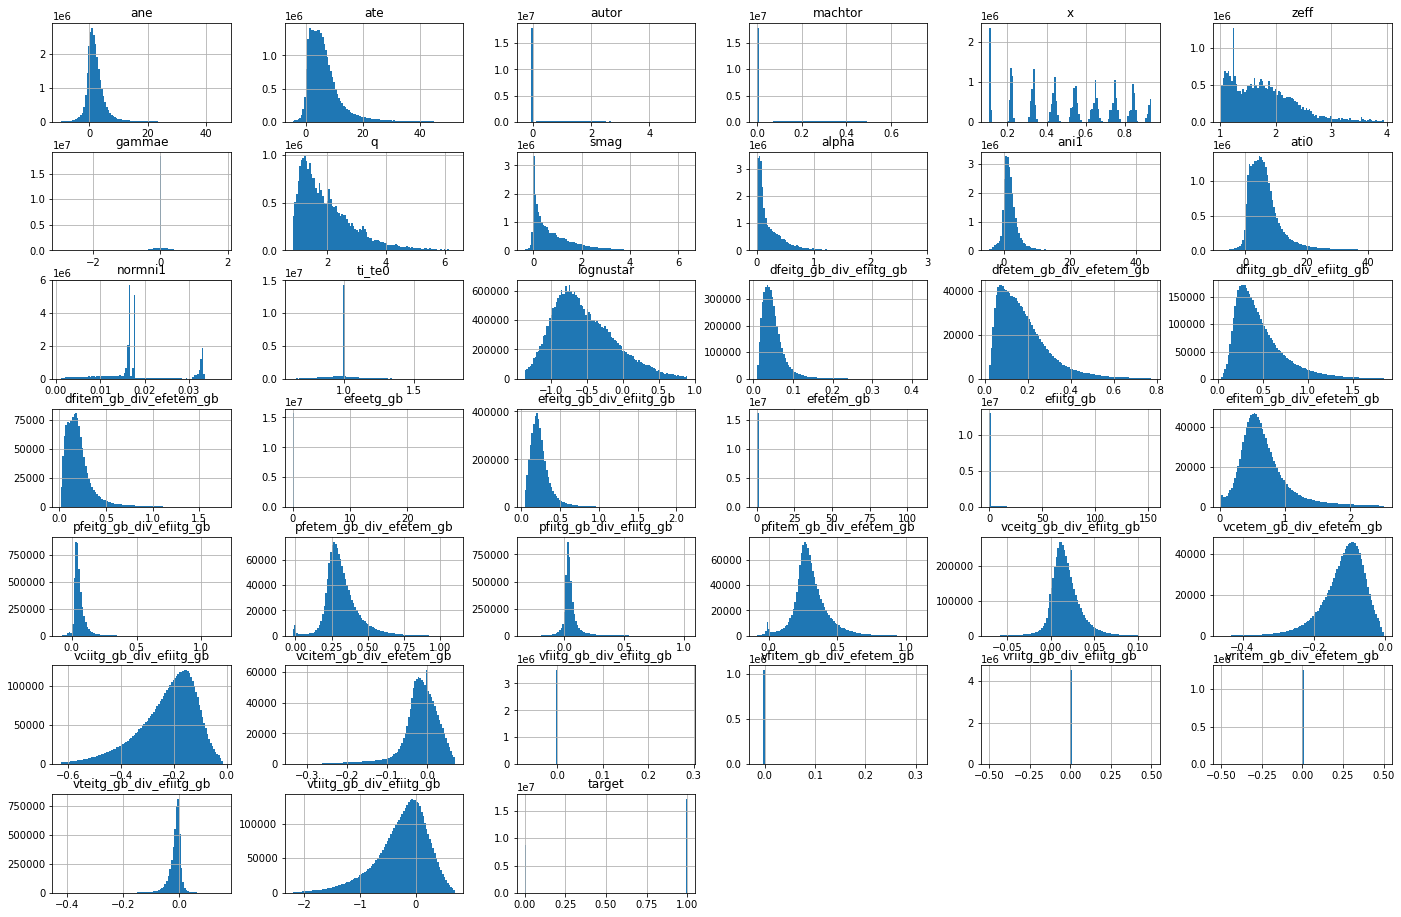

In [36]:
df_cut.hist(figsize = (24,16), bins = 100);

/home/jbarr/.conda/envs/UKAEA/lib/python3.9/site-packages/pandas/core/series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


array([0.])

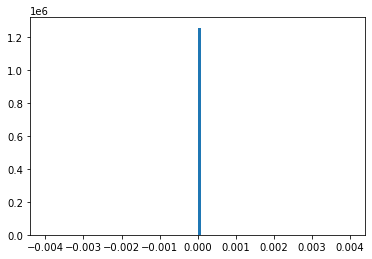

In [37]:
tmp = df_cut.vritem_gb_div_efetem_gb
tmp.dropna(inplace = True)
plt.figure()
plt.hist(tmp, bins = 100, range = (-0.004,0.004));
#tmp.hist(bins = 100, range = ())
tmp.unique()

In [ ]:
train, tmp = train_test_split(df, test_size = 0.2, random_state = 42)
valid, test = train_test_split(tmp, test_size = 0.5, random_state = 42)

In [ ]:
train.to_pickle(f"{path}UKAEAGroupProject/data/train_data_clipped.pkl")
valid.to_pickle(f"{path}UKAEAGroupProject/data/valid_data_clipped.pkl")
test.to_pickle(f"{path}UKAEAGroupProject/data/test_data_clipped.pkl")

In [18]:
!ls /lustre/home/pr5739/qualikiz/UKAEAGroupProject/data

ls: cannot access /lustre/home/pr5739/qualikiz/UKAEAGroupProject/data: No such file or directory


In [16]:
#df_in = pd.DataFrame(inputs, index_inp, input_names)
#df_in = df_in.loc[good_idx]
#df_in.rename(columns=lambda x: str(x.decode("utf-8")).lower() , inplace=True)

#df_out = pd.DataFrame(outputs, index_out, output_names)
#df_out = df_out.loc[good_idx]
#df_out.rename(columns=lambda x: str(x.decode("utf-8")).lower() , inplace=True)

In [17]:
#X_train, X_temp, y_train, y_temp = train_test_split(df_in, df_out, test_size = 0.2, random_state = 42)

#X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

In [18]:
#train_df = pd.concat([X_train, y_train], axis=1)
#valid_df = pd.concat([X_valid, y_valid], axis=1)
#test_df = pd.concat([X_test, y_test], axis=1)

#train_df.to_pickle("/share/rcifdata/jbarr/UKAEAGroupProject/data/QLKNN_train_data.pkl")
#valid_df.to_pickle("/share/rcifdata/jbarr/UKAEAGroupProject/data/QLKNN_validation_data.pkl")
#test_df.to_pickle("/share/rcifdata/jbarr/UKAEAGroupProject/data/QLKNN_test_data.pkl")